In [1]:
import sys
sys.path.append('~/Code/') 
from DataPreProcessor import DataPreProcessor
from DataRetriever import DataRetriever
from DataVisualization import DataVisualizer
import pandas as pd
import numpy as np
'''
start_date = '20191101'
end_date = '20191201'
getlog = DataRetriever(start_date, end_date, 'ray', '0420')
getlog.get_deviceID()
df = getlog.retrieve()
'''

"\nstart_date = '20191101'\nend_date = '20191201'\ngetlog = DataRetriever(start_date, end_date, 'ray', '0420')\ngetlog.get_deviceID()\ndf = getlog.retrieve()\n"

In [2]:
df = pd.read_hdf('../Data/raw_data.h5')

In [3]:
import importlib
import DataVisualization
import DataPreProcessor
importlib.reload(DataVisualization)
importlib.reload(DataPreProcessor)

<module 'DataPreProcessor' from '/Users/raylee/WebEnv-Proj/Code/DataPreProcessor.py'>

In [4]:
from DataPreProcessor import DataPreProcessor
proc = DataPreProcessor(df, 'LogTime')
proc.df.columns

Index(['LogTime', 'DC_cold_aisle', 'DC_hot_aisle', 'AC_avg_usage',
       'IT_avg_usage', 'DC_avg_usage', 'PUE', 'AC0_current', 'AC1_current',
       'Dev1_ambinet_temp', 'Dev1_CPU_temp', 'Dev1_power_temp',
       'Dev1_fan0_speed', 'Dev1_fan1_speed', 'Dev1_fan2_speed',
       'Dev1_fan3_speed', 'Dev1_fan4_speed', 'Dev1_fan5_speed',
       'Dev1_power_reading', 'Dev0_CPU_loading', 'Dev0_ambinet_temp',
       'Dev0_CPU_temp', 'Dev0_power_temp', 'Dev0_fan0_speed',
       'Dev0_fan1_speed', 'Dev0_fan2_speed', 'Dev0_fan3_speed',
       'Dev0_fan4_speed', 'Dev0_fan5_speed', 'Dev0_power_reading',
       'Dev1_CPU_loading', 'Dev2_ambinet_temp', 'Dev2_CPU_temp',
       'Dev2_power_temp', 'Dev2_fan0_speed', 'Dev2_fan1_speed',
       'Dev2_fan2_speed', 'Dev2_fan3_speed', 'Dev2_fan4_speed',
       'Dev2_fan5_speed', 'Dev2_power_reading', 'Dev2_CPU_loading',
       'FileServer_CPU_loading', 'ERP_CPU_loading', 'WebEnv_CPU_loading'],
      dtype='object')

In [5]:
proc.df.DC_avg_usage.fillna(method = 'ffill', limit = 1)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
252987    57.49
252989    57.49
252995    57.49
252997    57.49
253003    57.49
Name: DC_avg_usage, Length: 95519, dtype: float64

,Columns,Impute_method,Nan_count,Forward_filled,Backward_filled,Imputed_count
0,DC_cold_aisle,None,None,None,None,None
1,DC_hot_aisle,None,None,None,None,None
2,AC_avg_usage,linear,96,91,1,4
3,IT_avg_usage,linear,96,91,1,4
4,DC_avg_usage,linear,96,91,1,4
5,PUE,linear,96,91,1,4
6,AC0_current,linear,96,91,1,4
7,AC1_current,FillMedian,96,91,1,4
8,Dev1_ambinet_temp,linear,15087,5188,1574,8325
9,Dev1_CPU_temp,FillMedian,15087,5188,1574,8325


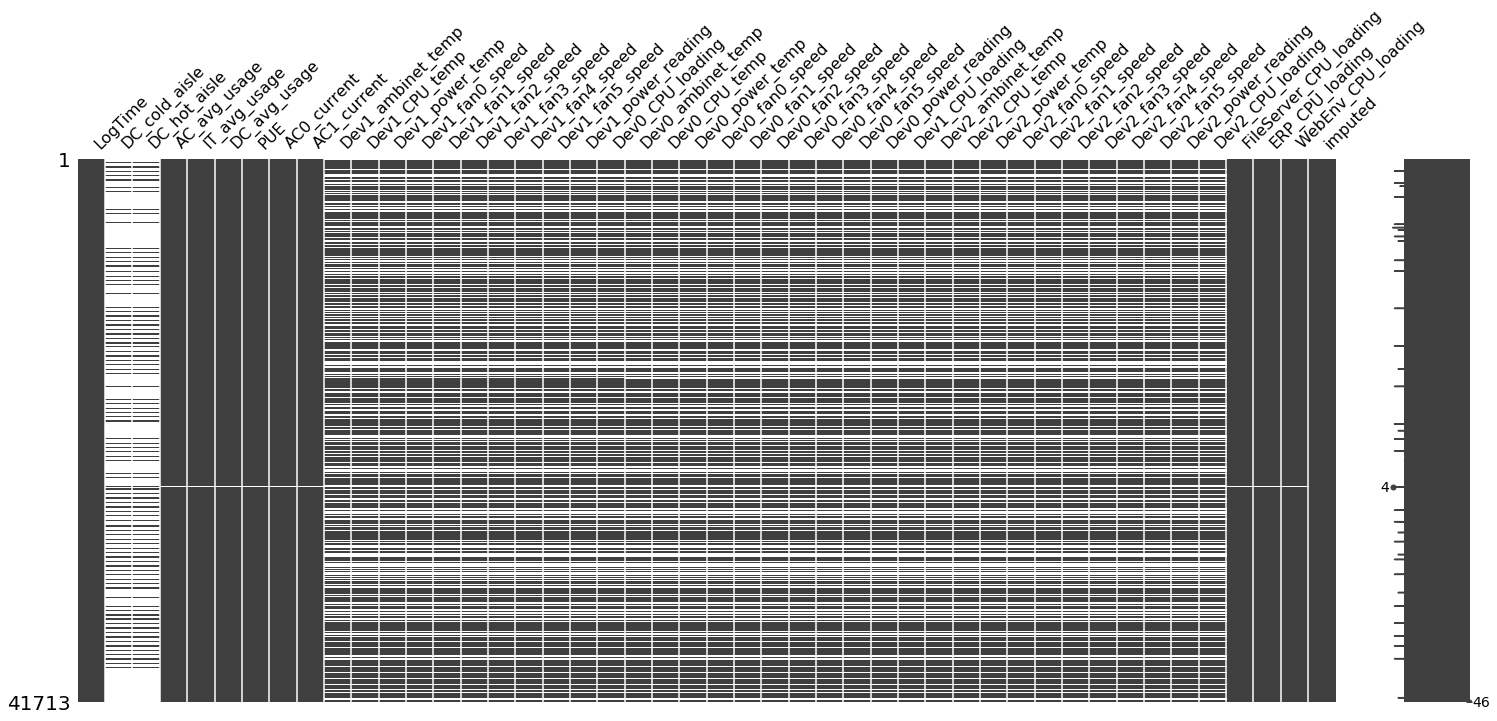

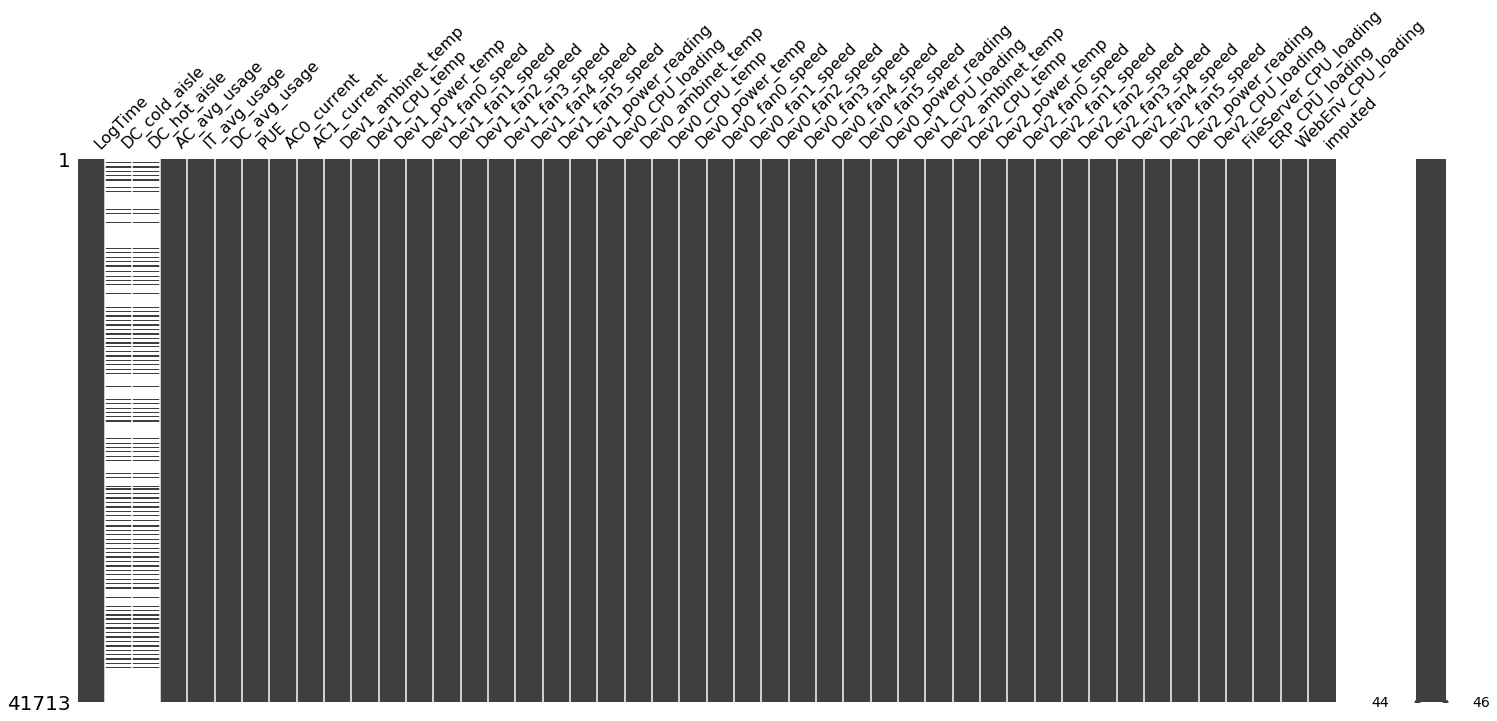

In [6]:
proc.drop_empty_rows()
proc.drop_duplicates()
proc.impute_all()

In [9]:
from copy import copy
work_df = copy(proc.df)

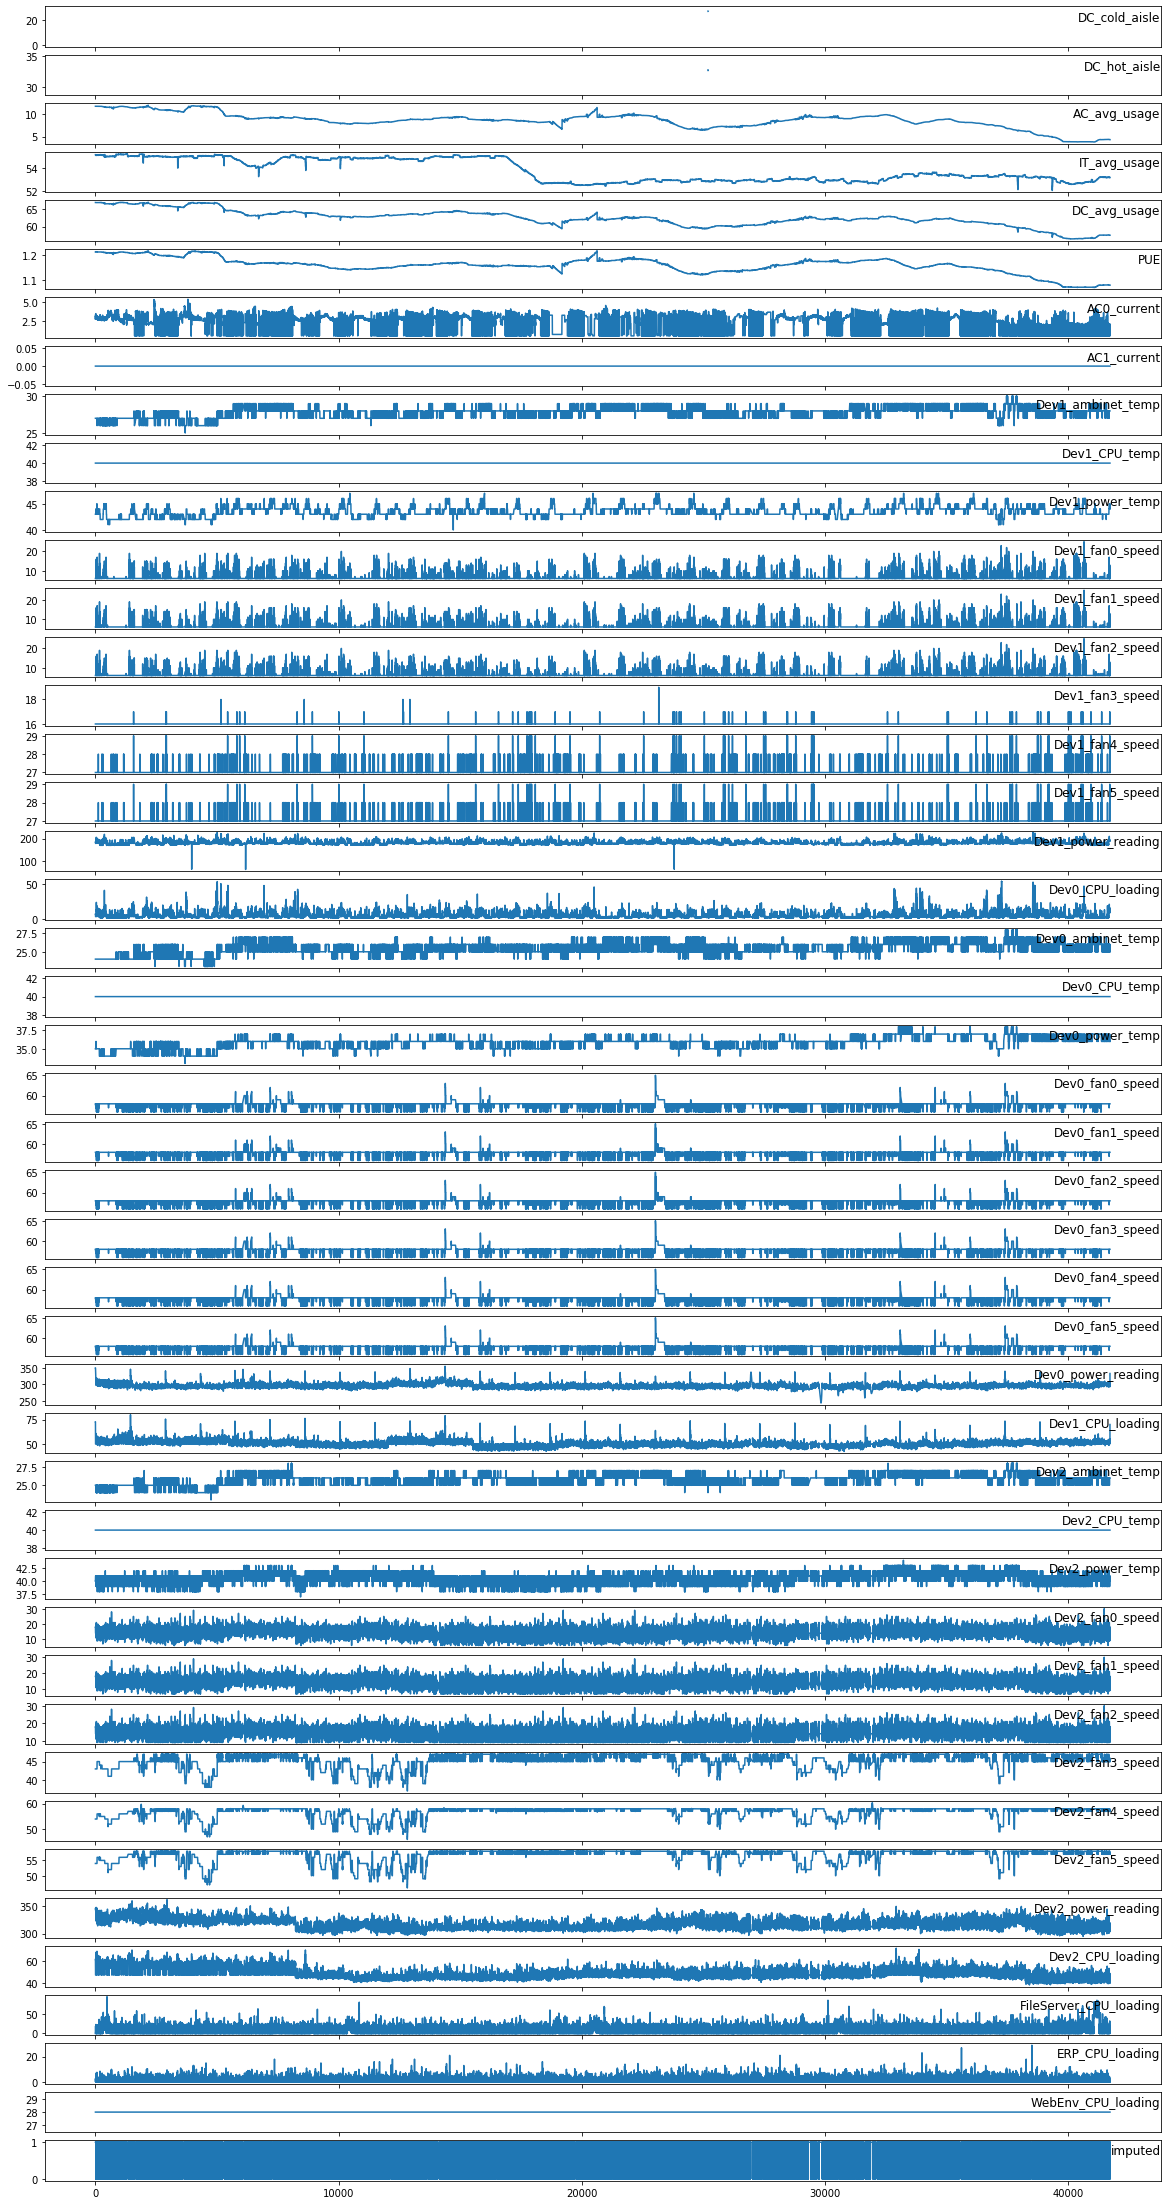

In [90]:
import matplotlib.pyplot as plt
# specify columns to plot
groups = [ x for x in range(1,len(work_df.columns))]
i = 1
# plot each column
plt.figure(figsize = (20,40))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(work_df.values[:, group])
    plt.title(work_df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [12]:
col_missingval = work_df.columns[work_df.isna().any()].tolist()
col_novar = work_df.drop(columns = 'LogTime').columns[work_df.var() == 0].tolist()
corr_matrix = work_df.drop(columns = col_missingval + col_novar).corr()

In [13]:
from DataVisualization import DataVisualizer
vis = DataVisualizer(work_df)

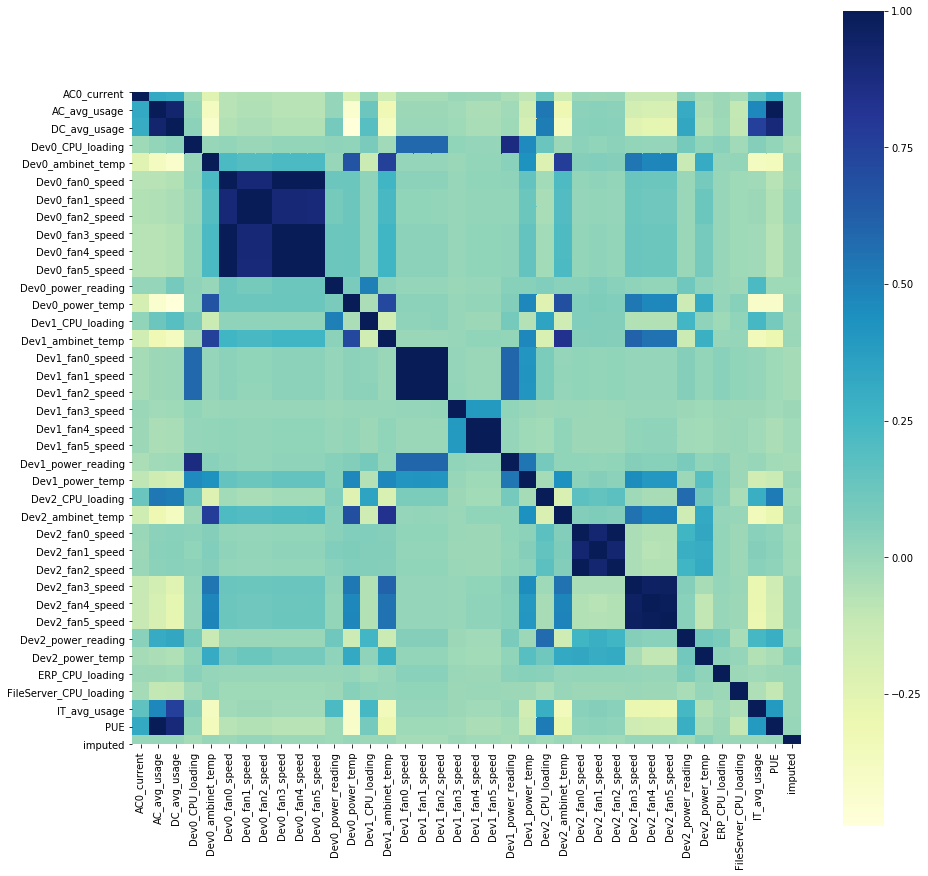

In [14]:
vis.plt_corr()

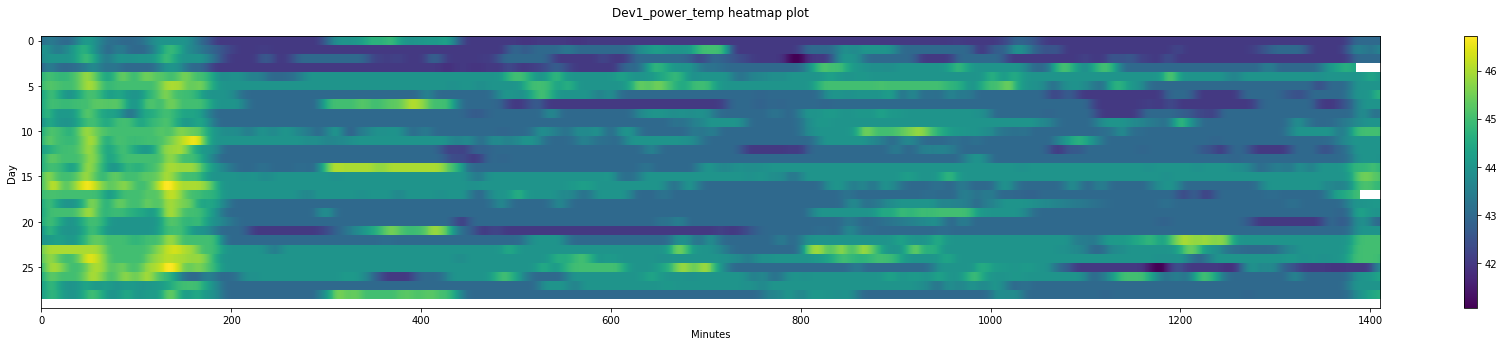

In [478]:
vis.var_heatmap('Dev1_power_temp', cmap = 'viridis', smoothing = True)

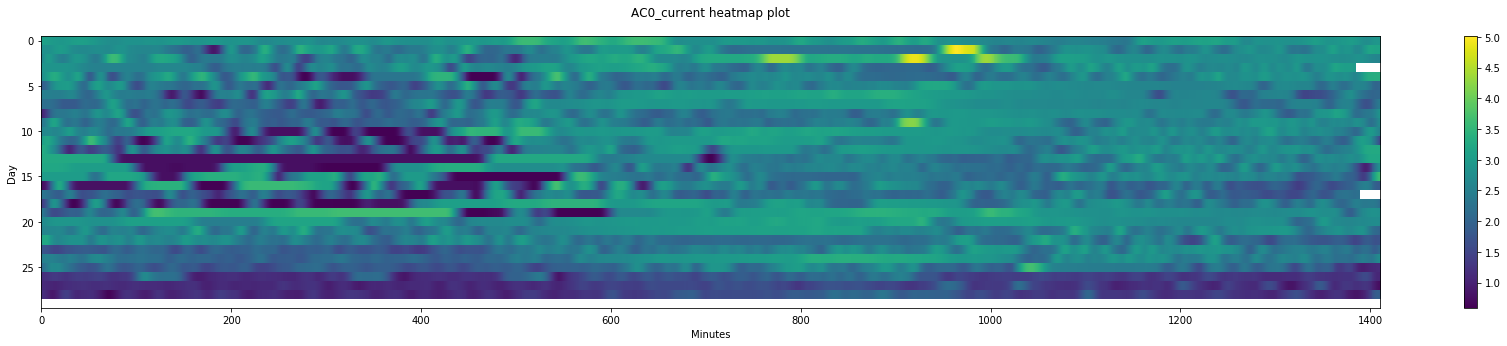

In [479]:
vis.var_heatmap("AC0_current", cmap = 'viridis')

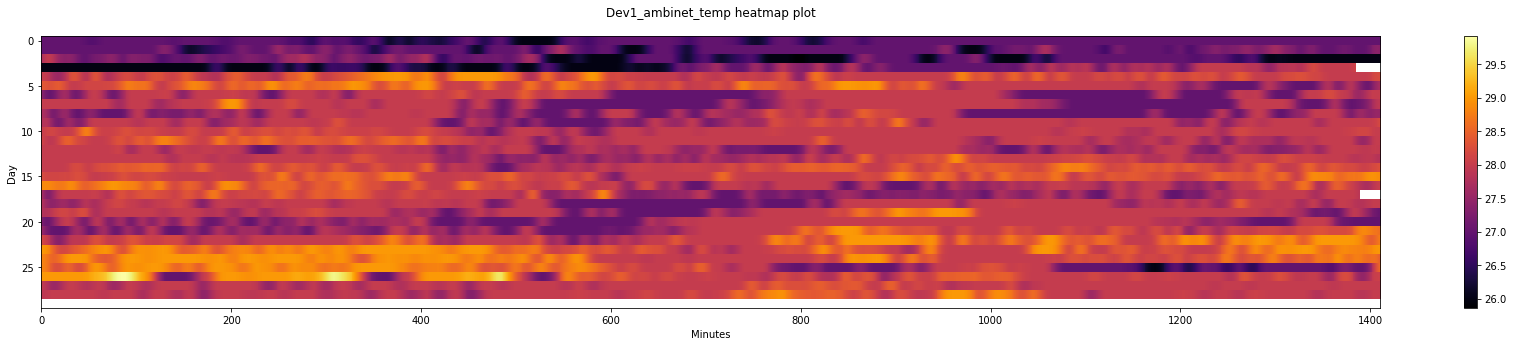

In [480]:
vis.var_heatmap("Dev1_ambinet_temp")

In [15]:
vis.df

,AC0_current,AC1_current,AC_avg_usage,DC_avg_usage,DC_cold_aisle,DC_hot_aisle,Dev0_CPU_loading,Dev0_CPU_temp,Dev0_ambinet_temp,Dev0_fan0_speed,...,Dev2_fan5_speed,Dev2_power_reading,Dev2_power_temp,ERP_CPU_loading,FileServer_CPU_loading,IT_avg_usage,LogTime,PUE,WebEnv_CPU_loading,imputed
0,2.78,0.0,11.810,66.93,NaN,NaN,6.79,40.0,24.0,58.000000,...,54.0,345.000000,40.0,2.5,0.0,55.12,2019-11-03 00:00:00,1.214,28.0,True
1,2.99,0.0,11.810,66.93,NaN,NaN,6.79,40.0,24.0,58.000000,...,54.0,345.000000,40.0,2.5,0.0,55.12,2019-11-03 00:01:00,1.214,28.0,True
2,2.98,0.0,11.810,66.93,28.3,33.1,3.20,40.0,24.0,57.944444,...,54.0,344.666667,41.0,0.0,4.0,55.12,2019-11-03 00:02:00,1.214,28.0,True
3,2.98,0.0,11.810,66.93,NaN,NaN,3.20,40.0,24.0,57.888889,...,54.0,344.333333,41.0,1.0,13.5,55.12,2019-11-03 00:03:00,1.214,28.0,True
4,3.18,0.0,11.810,66.93,NaN,NaN,3.20,40.0,24.0,57.833333,...,54.0,344.000000,41.0,0.5,1.5,55.12,2019-11-03 00:04:00,1.214,28.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41708,2.09,0.0,4.329,57.49,NaN,NaN,10.01,40.0,26.0,58.000000,...,57.0,309.000000,41.0,0.0,20.0,53.16,2019-12-01 23:56:00,1.081,28.0,True
41709,0.79,0.0,4.329,57.49,NaN,NaN,9.06,40.0,26.0,58.000000,...,57.0,307.000000,40.0,0.0,9.0,53.16,2019-12-01 23:57:00,1.081,28.0,True
41710,0.60,0.0,4.329,57.49,26.3,33.3,9.06,40.0,26.0,58.000000,...,57.0,307.000000,40.0,0.5,0.0,53.16,2019-12-01 23:58:00,1.081,28.0,False
41711,2.08,0.0,4.329,57.49,NaN,NaN,15.69,40.0,26.0,58.000000,...,57.0,306.000000,40.0,2.0,0.0,53.16,2019-12-01 23:59:00,1.081,28.0,True


In [16]:
vis.df[['Dev0_ambinet_temp','Dev1_ambinet_temp','Dev2_ambinet_temp','AC0_current']].corr()
vis.df[['Dev0_power_temp','Dev1_power_temp','Dev2_power_temp','AC0_current']].corr()

,Dev0_power_temp,Dev1_power_temp,Dev2_power_temp,AC0_current
Dev0_power_temp,1.000000,0.474279,0.321411,-0.187416
Dev1_power_temp,0.474279,1.000000,0.188939,-0.099756
Dev2_power_temp,0.321411,0.188939,1.000000,-0.026496
AC0_current,-0.187416,-0.099756,-0.026496,1.000000


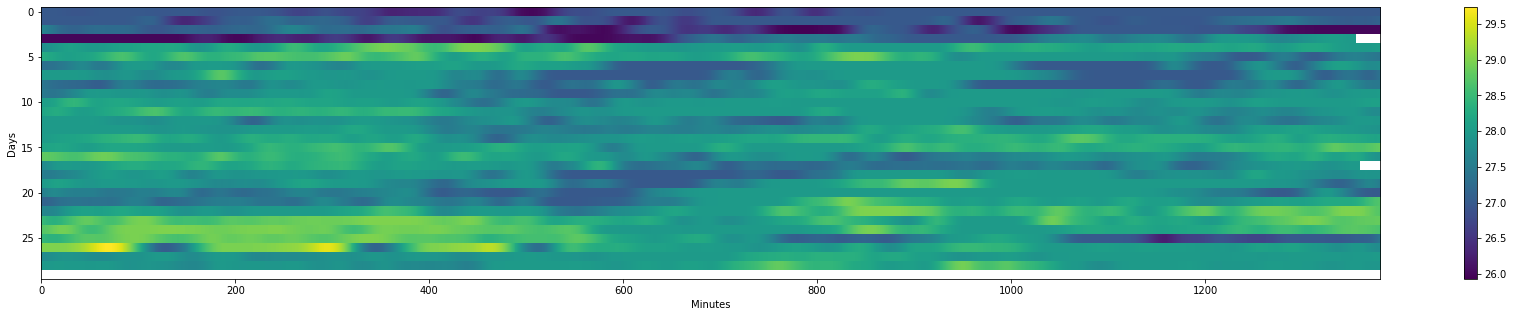

In [93]:
from matplotlib import cm
w = np.hanning(60)

groups = work_df.set_index('LogTime')['Dev1_ambinet_temp'].groupby(pd.Grouper(freq='D'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1).apply(lambda x : np.convolve(w/w.sum(),x,mode='valid'))
months = pd.DataFrame(months)
months = months.T
months.shape

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
cax = ax.matshow(months, interpolation=None, cmap="viridis", aspect='auto')
fig.colorbar(cax)
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Minutes')
plt.ylabel('Days')
plt.show()


In [19]:
work_df.set_index('LogTime')['Dev1_ambinet_temp'].groupby(pd.Grouper(freq='D')).apply(lambda x: len(x))

LogTime
2019-11-03    1440
2019-11-04    1440
2019-11-05    1440
2019-11-06    1414
2019-11-07    1440
2019-11-08    1440
2019-11-09    1440
2019-11-10    1440
2019-11-11    1440
2019-11-12    1440
2019-11-13    1440
2019-11-14    1440
2019-11-15    1440
2019-11-16    1440
2019-11-17    1440
2019-11-18    1440
2019-11-19    1440
2019-11-20    1418
2019-11-21    1440
2019-11-22    1440
2019-11-23    1440
2019-11-24    1440
2019-11-25    1440
2019-11-26    1440
2019-11-27    1440
2019-11-28    1440
2019-11-29    1440
2019-11-30    1440
2019-12-01    1440
2019-12-02       1
Freq: D, Name: Dev1_ambinet_temp, dtype: int64

In [20]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [21]:
## set.seed()
numpy.random.seed(420)

In [22]:
# adopt and modified from  https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def prep_input(data, scaler, n_in = 1, n_out =1, dropna = True, key = 'ambinet', time_var = 'LogTime'):
    '''
    Variables: 
        1. data: input dataframe to convert to LSTM ready input
        2. key: used to indicate and generate the response
        3. time_var: the column that is specified to be the timestamp
        4. scaler: the method requires a scaler to normalize the data set.
    Usage:
        input must be a dataframe with a time_var indicating the DateTime index to be used, 
        will perform the follwing actions: 
            1. create response column by integrating the values containing keyword `key` and drop those.
            2. drop columns contain NaN to avoid scaler error
            3. use MinMaxScaler to scale all values to [0,1]
            4. create input sequence(t-n, ...., t-1) and response requence(t,...t+n) 
    '''
    ## first create response columns
    df = pd.DataFrame(data).set_index(time_var)
    response_var = [x for x in data.columns if key in x]
    df['res'] = df[response_var].apply(lambda x: x.mean(), axis = 1).values
    df.drop(columns = response_var, inplace = True)
    
    ## drop columnms that contain Nan to avoid error 
    
    df.dropna(axis =1, inplace = True)
    
    ## scale the vars to be in [0,1] range
    
    df = pd.DataFrame(scaler.fit_transform(df.values.astype(np.float32)), columns = df.columns)
    
    n_vars = 0 if type(df) is list else df.shape[1] - 1
    cols, names = [], []
    ## input sequence (t-n, ....t-1) 
    for t in range(n_in, 0, -1):
        cols.append(df.drop(columns = 'res').shift(t)) ## explanatory vars
        cols.append(df['res'].shift(t)) ## response var
        names += ['var{}(t-{})'.format(j, t) for j in range(n_vars) ]
        names += ['res(t-{})'.format(t)]
    ## response sequence (t,... t+n)
    for t in range(0, n_out):
        cols.append(df['res'].shift(-t))
        if t ==0:
            names += ['res(t)']
        else: 
            names += ['res(t+{})'.format(t)]
    agg = pd.concat(cols, axis = 1)
    agg.columns = names
    
    if dropna: 
        ## first drop the rows that contains Nan produced by the shift.
        agg.dropna(axis = 0, thresh = max(n_in, n_out) + 1, inplace = True)
        ## then the columns with Nan values should be dropped
        agg.dropna(axis = 1, inplace = True)
    return agg

In [46]:
scaler = MinMaxScaler(feature_range= (0,1))
lstm_in = prep_input(vis.df, scaler)

In [47]:
def ts_train_test_split(data, perc = 0.8):
    '''
    Usage: 
        Analog of scipy train test split, while applying on time series data the data has to be continuous, thus the customized function.
        note that the response has to be in the last column
    '''
    length = len(data) if type(data) is list else data.shape[0]
    index = int(length * perc)
    train = data[:index, :]
    test = data[index: , :]
    X_train, y_train = train[:, :-1], train[:, -1]
    X_test, y_test = test[:, :-1], test[:, -1]
    
    ## importnat the X need to be reshape into 3D array for LSTM input [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    print("Using {}% as training and {}% test".format(100*perc, round(100*(1-perc))) )
    print("X reshape to have 3D: [samples, timesteps, features]")
    for i in ['X_train', 'X_test', 'y_train','y_test']:
        print('{}: shape{}'.format(i, eval(i).shape))
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_test, y_train, y_test = ts_train_test_split(lstm_in.values)

Using 80.0% as training and 20% test
X reshape to have 3D: [samples, timesteps, features]
X_train: shape(33369, 1, 41)
X_test: shape(8343, 1, 41)
y_train: shape(33369,)
y_test: shape(8343,)


In [49]:
def LSTM_model(X_train, X_val, y_train, y_val, params):
    from keras import optimizers
    
    #network
    model = Sequential()
    model.add(LSTM(41, return_sequences= False, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    RMS = optimizers.RMSprop(learning_rate=params['lr'], rho=0.9)
    model.compile(loss='mse',
                  optimizer= RMS,
                  metrics=['mae'])
    # fit network
    history = model.fit(X_train, y_train, epochs= params['epochs'], batch_size= params['batch_size'], validation_data=(X_test, y_test),verbose = 0)
    
    return history, model

In [27]:
from keras import optimizers
model = Sequential()
model.add(LSTM(41, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
RMS = optimizers.RMSprop(learning_rate= 0.0001, rho=0.9)
model.compile(loss='mse',
              optimizer= RMS,
              metrics=['mae'])
# fit network
history = model.fit(X_train, y_train, epochs= 60, batch_size= 100, validation_data=(X_test, y_test),verbose = 2)

Train on 33369 samples, validate on 8343 samples
Epoch 1/60
 - 1s - loss: 0.0265 - mae: 0.1236 - val_loss: 0.0136 - val_mae: 0.0934
Epoch 2/60
 - 0s - loss: 0.0062 - mae: 0.0610 - val_loss: 0.0057 - val_mae: 0.0588
Epoch 3/60
 - 0s - loss: 0.0041 - mae: 0.0493 - val_loss: 0.0044 - val_mae: 0.0520
Epoch 4/60
 - 0s - loss: 0.0034 - mae: 0.0442 - val_loss: 0.0037 - val_mae: 0.0470
Epoch 5/60
 - 0s - loss: 0.0029 - mae: 0.0406 - val_loss: 0.0033 - val_mae: 0.0436
Epoch 6/60
 - 0s - loss: 0.0027 - mae: 0.0377 - val_loss: 0.0031 - val_mae: 0.0412
Epoch 7/60
 - 0s - loss: 0.0025 - mae: 0.0353 - val_loss: 0.0031 - val_mae: 0.0396
Epoch 8/60
 - 0s - loss: 0.0023 - mae: 0.0335 - val_loss: 0.0030 - val_mae: 0.0384
Epoch 9/60
 - 0s - loss: 0.0023 - mae: 0.0323 - val_loss: 0.0030 - val_mae: 0.0378
Epoch 10/60
 - 0s - loss: 0.0022 - mae: 0.0314 - val_loss: 0.0030 - val_mae: 0.0372
Epoch 11/60
 - 0s - loss: 0.0022 - mae: 0.0307 - val_loss: 0.0031 - val_mae: 0.0377
Epoch 12/60
 - 0s - loss: 0.0022 - m

In [28]:
p = {'lr': [0.0001, 0.001, 0.01, 0.1],
     'first_neuron':[50],
     'batch_size': [20, 30, 40],
     'epochs': [60, 90, 120],
     'activation':['tanh','relu'],
     'recurrent_activation': ['sigmoid']}

In [50]:
X_test.shape

(8343, 1, 41)

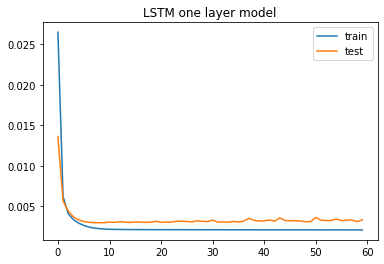

In [51]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('LSTM one layer model')
plt.show()

In [69]:
test_predict = model.predict(X_test)

In [70]:
y_inv_scaler = MinMaxScaler()
y_inv_scaler.min_,y_inv_scaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

In [105]:
y_forecast = y_inv_scaler.inverse_transform(test_predict).reshape(-1)
y_original = y_inv_scaler.inverse_transform(y_train.reshape(1,-1)).reshape(-1)
y_obs = y_inv_scaler.inverse_transform(y_test.reshape(1,-1)).reshape(-1)

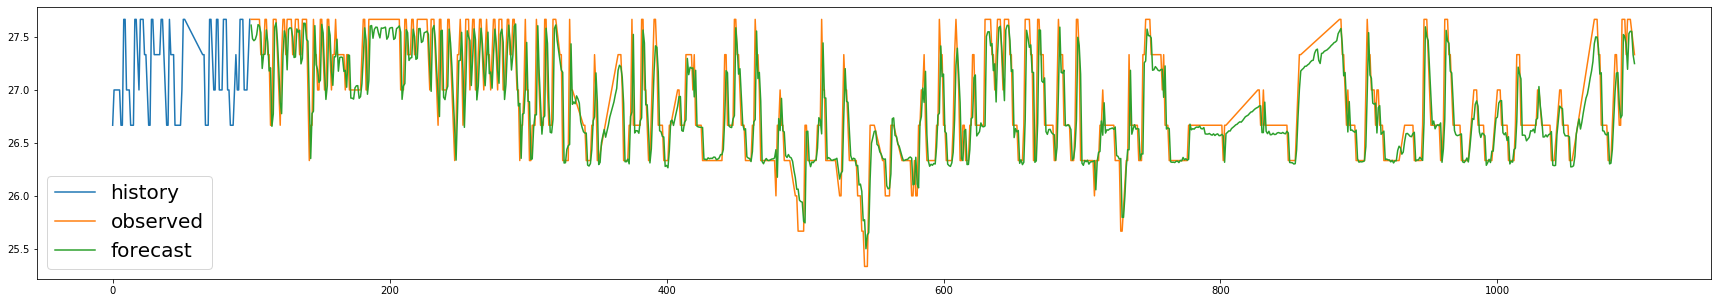

In [133]:
plt.figure(figsize=(30,5))
his_time = 100
pred_time = 1000
plt.plot(range(his_time),y_original[-his_time:])
plt.plot(range(his_time, pred_time+ his_time), y_obs[0:pred_time])
plt.plot(range(his_time, pred_time+ his_time), y_forecast[0:pred_time])
plt.legend(('history','observed','forecast'),prop={'size': 20})